# Home Equity Loan Default Data - Handle Missing Data

Read Lecture9-Home-Equity-Data-Description.docx to know the data better. Default is the y variable. This data set has a lot of missing values, we need to handle this issue properly before we can build the models. 

In [1]:
import pandas as pd

import warnings 
warnings.simplefilter("ignore")  

data0=pd.read_excel('lecture9-home-equity-data.xlsx')

data0.head().transpose() 



,0,1,2,3,4
Default,1,1,1,1,0
Loan_requested,1100,1300,1500,1500,1700
Amount_mortgage_due,25860.0,70053.0,13500.0,NaN,97800.0
Value_current_property,39025.0,68400.0,16700.0,NaN,112000.0
Reason,HomeImp,HomeImp,HomeImp,NaN,HomeImp
Job,Other,Other,Other,NaN,Office
Years_at_job,10.5,7.0,4.0,NaN,3.0
Derogatory_reports,0.0,0.0,0.0,NaN,0.0
Delinquent_credit,0.0,2.0,0.0,NaN,0.0
Months_oldest_credit,94.366667,121.833333,149.466667,NaN,93.333333


In [2]:
data0.isnull().sum()  # get the number of missing data points per column



Default                      0
Loan_requested               0
Amount_mortgage_due        518
Value_current_property     112
Reason                     252
Job                        279
Years_at_job               515
Derogatory_reports         708
Delinquent_credit          580
Months_oldest_credit       308
Credit_inquiry             510
Credit_lines               222
Debt_to_income            1267
dtype: int64

In [3]:
data0.shape

(5960, 13)

In [4]:
data1=data0.dropna()  # remove all the rows that contain a missing value 
data1.shape



(3364, 13)

If you remove all the rows with a missing value, you only have 56% of the data left. It is very typical in real life to have some attributes without values in each row, but you still have other attributes with useful information. Therefore, it's often not a good idea to delete all the rows with something missing. 

Another option is to "guess" a good value for the missing value through Imputation. Imputing missing values means using models to replace the missing values with reasonal guessed values. 

The simplest imputation model is to use the average (or mode) of the entire column. 

Another imputation model is to treat the missing value as y, and use the rest of the attributes to predict y. We will not cover this approach in this course.

In [5]:
data2=data0.fillna(data0.mean())
data2.shape

(5960, 13)

In [6]:
data0.head(8).transpose()

,0,1,2,3,4,5,6,7
Default,1,1,1,1,0,1,1,1
Loan_requested,1100,1300,1500,1500,1700,1700,1800,1800
Amount_mortgage_due,25860.0,70053.0,13500.0,NaN,97800.0,30548.0,48649.0,28502.0
Value_current_property,39025.0,68400.0,16700.0,NaN,112000.0,40320.0,57037.0,43034.0
Reason,HomeImp,HomeImp,HomeImp,NaN,HomeImp,HomeImp,HomeImp,HomeImp
Job,Other,Other,Other,NaN,Office,Other,Other,Other
Years_at_job,10.5,7.0,4.0,NaN,3.0,9.0,5.0,11.0
Derogatory_reports,0.0,0.0,0.0,NaN,0.0,0.0,3.0,0.0
Delinquent_credit,0.0,2.0,0.0,NaN,0.0,0.0,2.0,0.0
Months_oldest_credit,94.366667,121.833333,149.466667,NaN,93.333333,101.466002,77.1,88.76603


In [7]:
data2.head(8).transpose()

,0,1,2,3,4,5,6,7
Default,1,1,1,1,0,1,1,1
Loan_requested,1100,1300,1500,1500,1700,1700,1800,1800
Amount_mortgage_due,25860.0,70053.0,13500.0,73760.8172,97800.0,30548.0,48649.0,28502.0
Value_current_property,39025.0,68400.0,16700.0,101776.048741,112000.0,40320.0,57037.0,43034.0
Reason,HomeImp,HomeImp,HomeImp,NaN,HomeImp,HomeImp,HomeImp,HomeImp
Job,Other,Other,Other,NaN,Office,Other,Other,Other
Years_at_job,10.5,7.0,4.0,8.922268,3.0,9.0,5.0,11.0
Derogatory_reports,0.0,0.0,0.0,0.25457,0.0,0.0,3.0,0.0
Delinquent_credit,0.0,2.0,0.0,0.449442,0.0,0.0,2.0,0.0
Months_oldest_credit,94.366667,121.833333,149.466667,179.766275,93.333333,101.466002,77.1,88.76603


Since mean() only applies to numeric attributes, the missing values of the categorical attributes Reason and Job are not filled. 

In [8]:
data2.isnull().sum()

Default                     0
Loan_requested              0
Amount_mortgage_due         0
Value_current_property      0
Reason                    252
Job                       279
Years_at_job                0
Derogatory_reports          0
Delinquent_credit           0
Months_oldest_credit        0
Credit_inquiry              0
Credit_lines                0
Debt_to_income              0
dtype: int64

For categorical attributes, we treat missing values as one possible categorical value ('Missing'), because sometimes being missing itself carries some information (e.g. the customer is more concerned about privacy, etc.) which can be useful to build better models. 

In [9]:
data3=data2.fillna('Missing')
data3.head(8).transpose()

,0,1,2,3,4,5,6,7
Default,1,1,1,1,0,1,1,1
Loan_requested,1100,1300,1500,1500,1700,1700,1800,1800
Amount_mortgage_due,25860.0,70053.0,13500.0,73760.8172,97800.0,30548.0,48649.0,28502.0
Value_current_property,39025.0,68400.0,16700.0,101776.048741,112000.0,40320.0,57037.0,43034.0
Reason,HomeImp,HomeImp,HomeImp,Missing,HomeImp,HomeImp,HomeImp,HomeImp
Job,Other,Other,Other,Missing,Office,Other,Other,Other
Years_at_job,10.5,7.0,4.0,8.922268,3.0,9.0,5.0,11.0
Derogatory_reports,0.0,0.0,0.0,0.25457,0.0,0.0,3.0,0.0
Delinquent_credit,0.0,2.0,0.0,0.449442,0.0,0.0,2.0,0.0
Months_oldest_credit,94.366667,121.833333,149.466667,179.766275,93.333333,101.466002,77.1,88.76603


In [10]:
data3.isnull().sum()

Default                   0
Loan_requested            0
Amount_mortgage_due       0
Value_current_property    0
Reason                    0
Job                       0
Years_at_job              0
Derogatory_reports        0
Delinquent_credit         0
Months_oldest_credit      0
Credit_inquiry            0
Credit_lines              0
Debt_to_income            0
dtype: int64

After the above data transformations, you can follow what we have done for the IBM data to build classification models. 

In [11]:
data3.head().transpose()

,0,1,2,3,4
Default,1,1,1,1,0
Loan_requested,1100,1300,1500,1500,1700
Amount_mortgage_due,25860.0,70053.0,13500.0,73760.8172,97800.0
Value_current_property,39025.0,68400.0,16700.0,101776.048741,112000.0
Reason,HomeImp,HomeImp,HomeImp,Missing,HomeImp
Job,Other,Other,Other,Missing,Office
Years_at_job,10.5,7.0,4.0,8.922268,3.0
Derogatory_reports,0.0,0.0,0.0,0.25457,0.0
Delinquent_credit,0.0,2.0,0.0,0.449442,0.0
Months_oldest_credit,94.366667,121.833333,149.466667,179.766275,93.333333


In [13]:
from my_functions import cat_to_dummy

data3 = cat_to_dummy(data3,["Reason", "Job"])

data3.head().transpose()

,0,1,2,3,4
Default,1.000000,1.000000,1.000000,1.000000,0.000000
Loan_requested,1100.000000,1300.000000,1500.000000,1500.000000,1700.000000
Amount_mortgage_due,25860.000000,70053.000000,13500.000000,73760.817200,97800.000000
Value_current_property,39025.000000,68400.000000,16700.000000,101776.048741,112000.000000
Years_at_job,10.500000,7.000000,4.000000,8.922268,3.000000
Derogatory_reports,0.000000,0.000000,0.000000,0.254570,0.000000
Delinquent_credit,0.000000,2.000000,0.000000,0.449442,0.000000
Months_oldest_credit,94.366667,121.833333,149.466667,179.766275,93.333333
Credit_inquiry,1.000000,0.000000,1.000000,1.186055,0.000000
Credit_lines,9.000000,14.000000,10.000000,21.296096,14.000000


In [15]:
from my_functions import stratified_sample

X_train, X_test, y_train, y_test = stratified_sample(data3,'Default',0.8)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(4768, 20) (1192, 20) (4768,) (1192,)


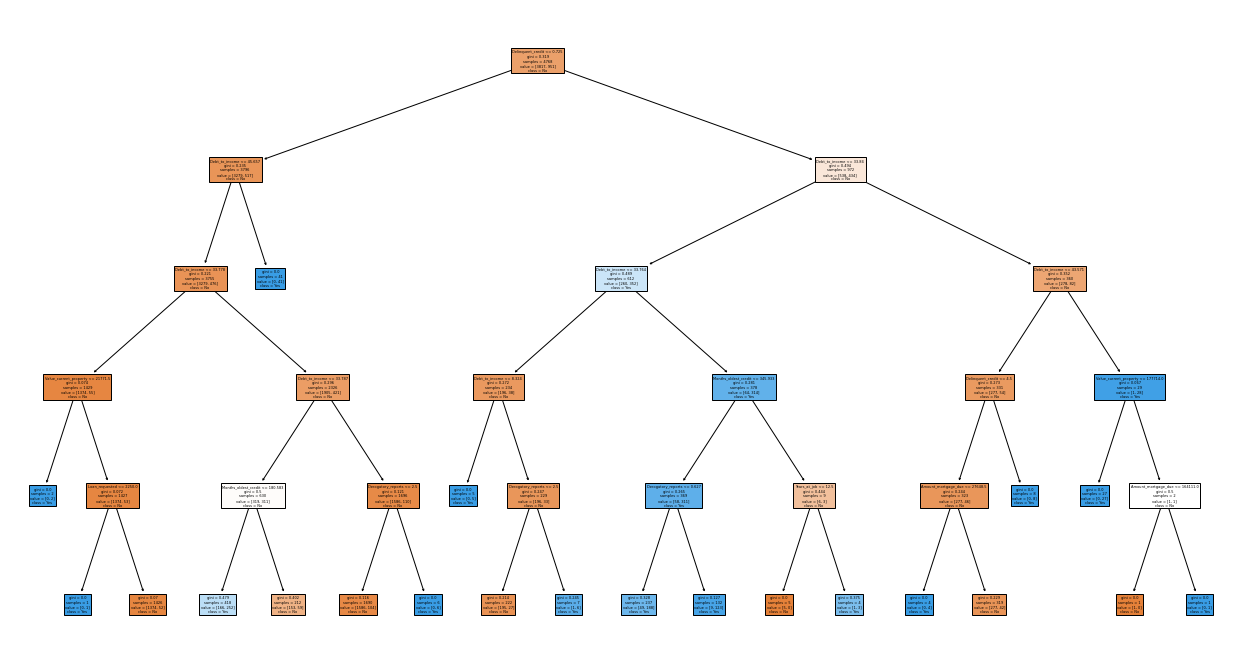

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt # This package is used to plot the tree. Here, it's used to decide the figure size.  

#model = DecisionTreeClassifier(class_weight='balanced')
model = DecisionTreeClassifier() # Fitting a decision tree model with default parameters
dt = GridSearchCV(model, param_grid={"max_depth": [0,1,2,3,4,5]}) # a dictionary with the parameter name as the key, and the list contains the options, default is 5 fold, but you can change it with additin parameters. 

dt = dt.fit(X_train, y_train) # you can also delete 'dt = '. dt.fit() modifies dt and also returns dt. 

plt.subplots(figsize=(22, 12)) # width & height, define the overall dimension of the figure
plot_tree(dt.best_estimator_, feature_names=X_train.columns, class_names=['No','Yes'],filled=True, proportion=False) # CV built 5 trees (estimators), best_estimator_ is the one with best accuracy.
plt.show()



In [18]:
y_pred_dt = dt.predict(X_test)

print("Decision tree accuracy for test set:", dt.score(X_test, y_test)) #score() is a method for DecisionTreeClassifier, it returns the mean accuracy on the given test data and labels.

print("\nClassification report:")
print(classification_report(y_test, y_pred_dt))

print(dt.best_estimator_.feature_importances_)

print(X_train.columns) # print the column names for reference. 


Decision tree accuracy for test set: 0.8875838926174496

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       954
           1       0.74      0.68      0.71       238

    accuracy                           0.89      1192
   macro avg       0.83      0.81      0.82      1192
weighted avg       0.88      0.89      0.89      1192

[0.00256348 0.00961208 0.00640249 0.00345391 0.02919148 0.2217553
 0.04724507 0.         0.         0.67977619 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
Index(['Loan_requested', 'Amount_mortgage_due', 'Value_current_property',
       'Years_at_job', 'Derogatory_reports', 'Delinquent_credit',
       'Months_oldest_credit', 'Credit_inquiry', 'Credit_lines',
       'Debt_to_income', 'Reason_DebtCon', 'Reason_HomeImp', 'Reason_Missing',
       'Job_Mgr', 'Job_Missing', 'Job_Office', 'Job_Other', 'Job_ProfExe',
       'Job_Sales', 'Job_S

In [19]:
from sklearn.linear_model import LogisticRegression

#model = LogisticRegression(class_weight='balanced')
model = LogisticRegression()
logreg = GridSearchCV(model,param_grid={"penalty": ['l1','l2']})

logreg.fit(X_train, y_train)

y_pred_log = logreg.predict(X_test)

print("Logistic regression accuracy for test set:", logreg.score(X_test, y_test))
print("\nClassification report:")
print(classification_report(y_test, y_pred_log))
print(logreg.best_estimator_.coef_)
print(logreg.best_estimator_.intercept_)
print(X_train.columns)


Logistic regression accuracy for test set: 0.8011744966442953

Classification report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       954
           1       0.60      0.01      0.02       238

    accuracy                           0.80      1192
   macro avg       0.70      0.51      0.46      1192
weighted avg       0.76      0.80      0.72      1192

[[-2.91262288e-05 -8.22109066e-06  2.92034535e-06 -4.19802597e-03
   3.83553106e-03  7.18036971e-03 -7.21372408e-03  4.41263669e-03
   5.54737352e-03  1.71017444e-02 -2.62611905e-04  2.08295512e-04
  -3.71652001e-05  1.91543211e-04 -3.21170628e-04 -4.78916905e-04
   4.38217024e-04 -2.56706292e-04  1.12340928e-04  2.23211068e-04]]
[-9.1481735e-05]
Index(['Loan_requested', 'Amount_mortgage_due', 'Value_current_property',
       'Years_at_job', 'Derogatory_reports', 'Delinquent_credit',
       'Months_oldest_credit', 'Credit_inquiry', 'Credit_lines',
       'Debt_to_income', 'Reason_

In [20]:
from sklearn.ensemble import RandomForestClassifier

#model = RandomForestClassifier(class_weight='balanced_subsample')
model = RandomForestClassifier()
rf = GridSearchCV(model,param_grid={"max_depth": [0,1,2,3,4,5,6,7,8,9]})
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random forest accuracy for test set:", rf.score(X_test, y_test))
print("\nClassification report:")
print(classification_report(y_test, y_pred_rf))


Random forest accuracy for test set: 0.8917785234899329

Classification report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       954
           1       0.93      0.50      0.65       238

    accuracy                           0.89      1192
   macro avg       0.91      0.74      0.79      1192
weighted avg       0.90      0.89      0.88      1192



In [21]:
data_pred=X_test
data_pred['true_y']=y_test
data_pred['pred_y']=y_pred_rf 
data_pred.to_excel('Homework9_Predictions.xlsx', index=None)
